In [2]:
import numpy as np
from math import exp, pow
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline
np.random.seed(99)

## Gaussian 

In [33]:
def Gauss(x, mu, s):
    var = pow(s, 2)
    num = np.sqrt(2 * np.pi * var)
    dom = np.exp(-(x - mu)**2 / (2 * var))
    return dom/num

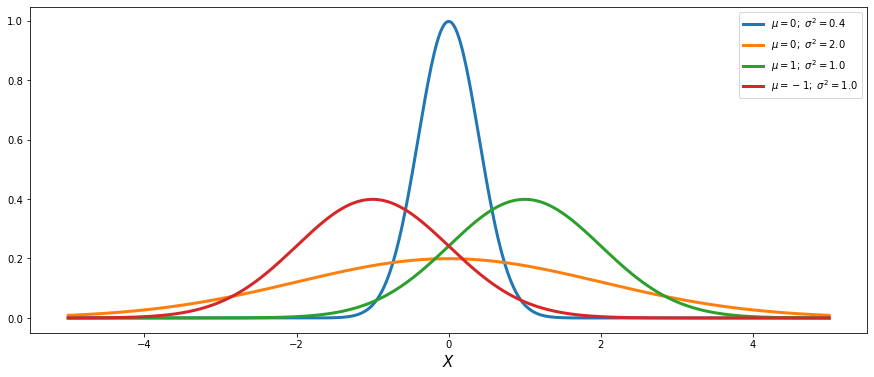

In [53]:
x = np.linspace(-5, 5, 500)
mu = [0, 0, 1, -1]
s = [0.4, 2.0, 1.0, 1.0]

plt.figure(figsize=(15, 6))

for mu_, s_ in zip(mu, s):
    y = [Gauss(xi, mu_, s_) for xi in x]
    plt.plot(x, y, linewidth=3, label='$\mu={}; \ \sigma^2={}$'.format(mu_, s_));
    
plt.xlabel('$X$', fontsize=15)
plt.legend();

In [63]:
def plot_contour(mu, cov, ax, title):
    
    N = 200
    X = np.linspace(-4, 4, N)
    Y = np.linspace(-4, 4, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mu, cov)
    Z = rv.pdf(pos)

    ax.contour(X, Y, Z)
    ax.set_title(title)
    return ax

In [64]:
mu = [[0,0], [0, 0], [0,0]]
cov = [
    [[2.0, 0.8],[0.7, 2.0]],
    [[3, 0],[0, 0.5]],
    [[3, 0],[0, 3]]
]
titles = ['Full', 'Diagonal', 'Isotropic']

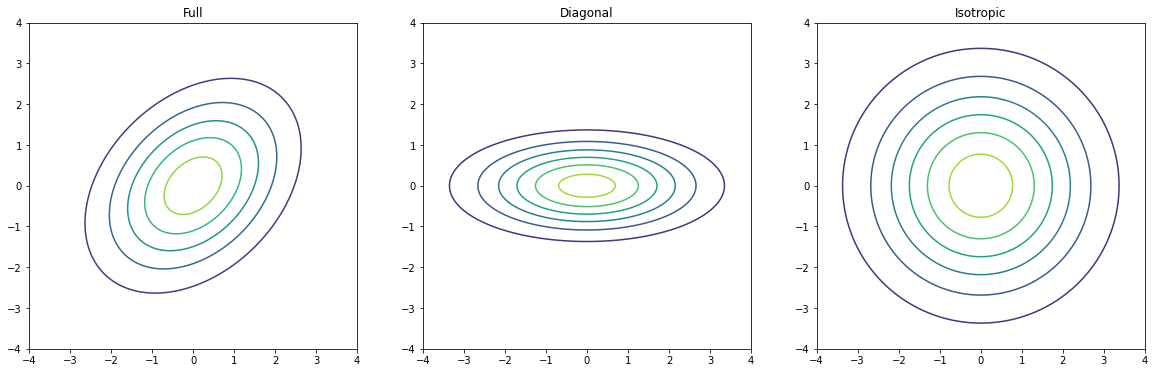

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (title, (mu_, cov_)) in enumerate(zip(titles, zip(mu, cov))):
    plot_contour(mu_, cov_, axes[i], title)